In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
D4 = cv2.imread('/content/drive/MyDrive/image_data/Fruits Classification/train/Apple/Apple (1).jpeg')
D4 = cv2.cvtColor(D4,cv2.COLOR_BGR2RGB)


D4 = cv2.imread('/content/drive/MyDrive/image_data/Fruits Classification/train/Apple/Apple (1).jpeg')

In [3]:
type(D4)

numpy.ndarray

In [4]:
D4.shape

(147, 120, 3)

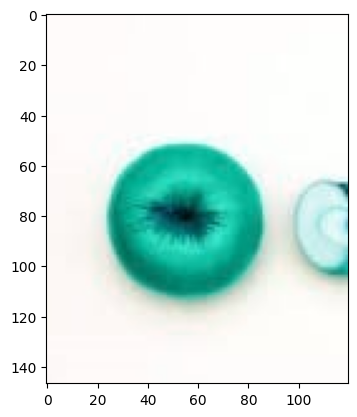

In [5]:
plt.imshow(D4)

In [6]:
D2 = cv2.imread('/content/drive/MyDrive/image_data/Fruits Classification/train/Apple/Apple (10).jpeg')
D2 = cv2.cvtColor(D2,cv2.COLOR_BGR2RGB)

In [7]:
D2.shape

(176, 143, 3)

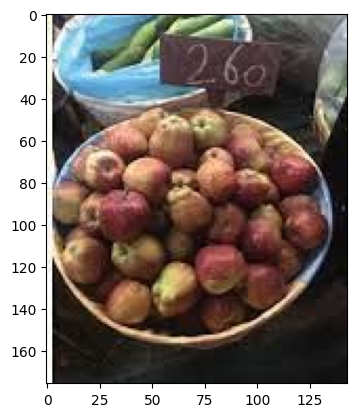

In [8]:
plt.imshow(D2)

In [16]:
#preparing the data set for model
!pip install keras
!pip install tensorflow

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Create an instance of the ImageDataGenerator class
image_gen = ImageDataGenerator()

# Now you can use image_gen
image_gen.flow_from_directory('/content/drive/MyDrive/image_data/Fruits Classification/train')

Found 9700 images belonging to 5 classes.


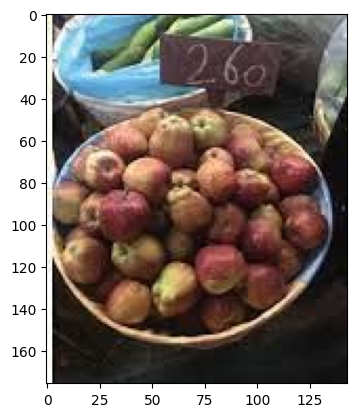

In [19]:
plt.imshow(image_gen.random_transform(D2))

In [12]:
image_gen.flow_from_directory('/content/drive/MyDrive/image_data/Fruits Classification/test')

Found 100 images belonging to 5 classes.


In [20]:
#Resezing images
image_shape = (150,150,3)

In [21]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the number of classes
num_classes = 5  # Replace this with the actual number of classes in your dataset

# Load the MobileNetV2 model pre-trained on ImageNet, without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten for better performance with MobileNetV2
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model with the optimizer and correct learning rate
optimizer = Adam(learning_rate=0.0001)  # You can adjust the learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/image_data/Fruits Classification/train',  # Your training data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Ensure it's categorical for multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/image_data/Fruits Classification/test',  # Your validation data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Ensure it's categorical for multi-class classification
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the validation data
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print('Validation accuracy:', test_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2422597 (9.24 MB)
Trainable params: 1646

In [23]:
# Save the trained model
model.save('/content/drive/MyDrive/model111.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/model111.h5')


In [32]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from PIL import Image
import io

# Function to preprocess the image
def preprocess_image(img):
    img = img.resize((150, 150))  # Resize to match model input
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load an image file
def predict(image_path):
    # Load and preprocess the image
    img = Image.open(image_path)
    img_array = preprocess_image(img)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Map class indices to labels
    class_labels = {0: 'Apple', 1: 'Banana', 2: 'Orange', 3: 'Strawberry', 4: 'Grapes'}  # Update with your actual labels
    predicted_label = class_labels.get(predicted_class[0], "Unknown")

    return predicted_label

# Example usage
image_path = '/pexels-pixabay-206959.jpg'  # Replace with the path to the image you want to classify
prediction = predict(image_path)
print(f'Predicted class: {prediction}')


1/1 [==============================] - 1s 1s/step
Predicted class: Apple


In [33]:
!pip install --upgrade gradio


In [34]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/model111.h5')

# Define the function for making predictions
def predict(img):
    img = img.resize((150, 150))  # Resize image to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Map class indices to labels
    class_labels = {0: 'Apple', 1: 'Banana', 2: 'Orange', 3: 'Strawberry', 4: 'Grapes'}  # Replace with your actual class labels
    predicted_label = class_labels.get(predicted_class[0], "Unknown")

    return predicted_label

# Define the Gradio interface
interface = gr.Interface(
    fn=predict,  # The function to call for predictions
    inputs=gr.Image(type="pil"),  # Define the input type (image) with PIL format
    outputs=gr.Text(),  # Define the output type (text)
    live=True  # Update the interface live as the user interacts
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9378e8a9f74b4be616.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [35]:
!pip install fastapi uvicorn


In [38]:
import keras
print(keras.__version__)

2.15.0


In [43]:
import tensorflow

In [44]:
print(tensorflow.__version__)

2.15.0


In [46]:
train_generator.class_indices

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}